In [1]:
using CSV
using DataFrames
using Plots
pyplot();

In [2]:
data2020 = CSV.read("all20.tsv")
data2016 = CSV.read("all16.tsv")

,town,trump,clinton,stein,roque,johnson
,String,Int64,Int64,Int64,Int64,Int64
1,Albany,182,195,7,2,13
2,Bartlett,730,1094,21,0,84
3,Brookfield,262,156,3,1,25
4,Chatham,103,79,3,0,19
5,Conway,2204,2717,57,2,209
6,Eaton,109,157,2,0,14
7,Effingham,481,317,6,0,38
8,Freedom,476,425,14,1,36
9,Hale's Location,97,26,0,0,0


In [3]:
total = [sum([f.trump, f.clinton, f.stein, f.roque, f.johnson]) for f in eachrow(data2016)]
data2016[!, :total16] = total
data2016[!, :trumpfrac] = data2016.trump ./ total;

In [4]:
data2020[!, :total20] = [sum([f.biden, f.buttigieg, f.gabbard, f.klobuchar, f.sanders, f.steyer, f.warren]) for f in eachrow(data2020)];

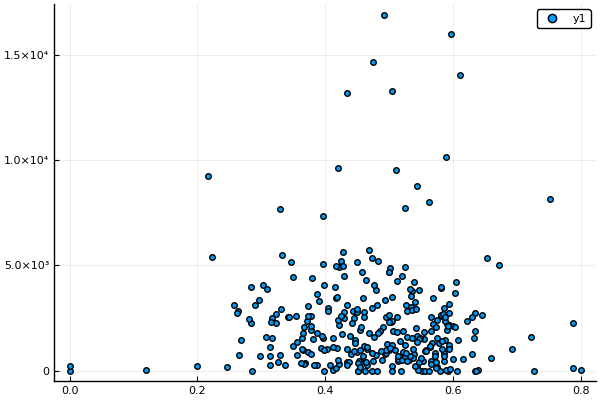

In [5]:
combo = filter(join(data2016, data2020, on=:town)) do row
    row.total20 > 0 && isfinite(row.trumpfrac)
end
Plots.scatter(combo.trumpfrac, total)

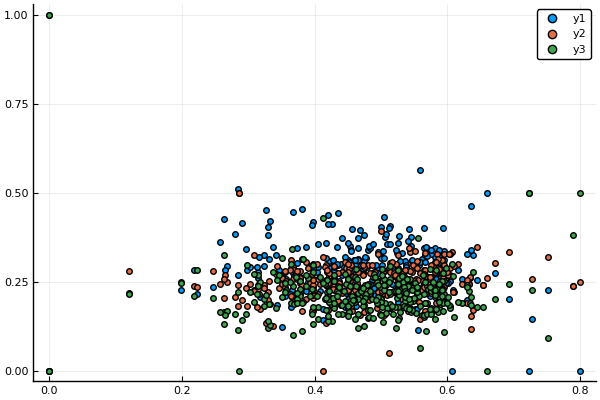

In [6]:
plt = Plots.scatter(combo.trumpfrac, combo.sanders ./ combo.total20)
Plots.scatter!(plt, combo.trumpfrac, combo.buttigieg ./ combo.total20)
Plots.scatter!(plt, combo.trumpfrac, combo.klobuchar./ combo.total20)

In [7]:
function binnedavg(edges, datax, datay)
    count = zeros(length(edges)-1)
    total = zeros(Float64, length(edges)-1)
    for (x, y) in zip(datax, datay)
        for idx in 1:length(edges)-1
            if edges[idx] <= x < edges[idx+1]
                count[idx] += 1
                total[idx] += y
                break
            end
        end
    end
    return total ./ count
end;

In [8]:
delta = 0.05
range = 0.2:delta:0.7
centered = [x + delta / 2 for x in range[1:end-1]]
avgsanders = binnedavg(range, combo.trumpfrac, combo.sanders ./ combo.total20)
avgpete = binnedavg(range, combo.trumpfrac, combo.buttigieg ./ combo.total20)
avgamy = binnedavg(range, combo.trumpfrac, combo.klobuchar ./ combo.total20)
avgbiden = binnedavg(range, combo.trumpfrac, combo.biden ./ combo.total20)
avgwarren = binnedavg(range, combo.trumpfrac, combo.warren ./ combo.total20)
avgsteyer = binnedavg(range, combo.trumpfrac, combo.steyer ./ combo.total20)
avggabbard = binnedavg(range, combo.trumpfrac, combo.gabbard ./ combo.total20);

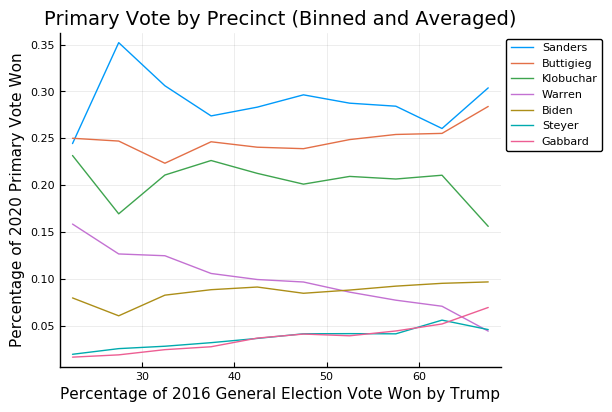

In [9]:
plt = Plots.plot(centered * 100, avgsanders, label="Sanders")
Plots.plot!(plt, centered * 100, avgpete, label="Buttigieg")
Plots.plot!(plt, centered * 100, avgamy, label="Klobuchar")
Plots.plot!(plt, centered * 100, avgwarren, label="Warren")
Plots.plot!(plt, centered * 100, avgbiden, label="Biden")
Plots.plot!(plt, centered * 100, avgsteyer, label="Steyer")
Plots.plot!(plt, centered * 100, avggabbard, label="Gabbard")
Plots.xlabel!(plt, "Percentage of 2016 General Election Vote Won by Trump")
Plots.ylabel!(plt, "Percentage of 2020 Primary Vote Won")
Plots.title!(plt, "Primary Vote by Precinct (Binned and Averaged)", legend=:outertopright)
savefig(plt, "trumpshare.png")